In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

learning_rate = 1e-3
batch_size = 64
epochs = 5

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()

In [9]:
%pip install -e ..

Obtaining file:///C:/Projects/fasttrain
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for fasttrain (pyproject.toml): started
  Building editable for fasttrain (pyproject.toml): finished with status 'done'
  Created wheel for fasttrain: filename=fasttrain-0.0.7-0.editable-py3-none-any.whl size=8150 sha256=3430c61383a91cd47fe76733f25fa1df77e6ce7d686ae16f2f8e7df114853b95
  Stored in directory: C:\Users\Dmitry\AppData\Local

In [14]:
%pip uninstall ipywidgets

^C
Note: you may need to restart the kernel to use updated packages.


In [2]:
from fasttrain import Trainer
from fasttrain.metrics import accuracy

class FashionMNISTTrainer(Trainer):

    def compute_loss(self, input_batch, output_batch):
        (_, y_batch) = input_batch
        return nn.CrossEntropyLoss()(output_batch, y_batch)

    def eval_metrics(self, input_batch, output_batch):
        (_, y_batch) = input_batch
        return {
            "accuracy": accuracy(output_batch, y_batch)
        }

In [13]:
from time import sleep

from tqdm import trange


for i in trange(1, 100):
    sleep(0.5)






  4%|▍         | 4/99 [00:02<00:59,  1.59it/s]


KeyboardInterrupt: 

In [3]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
trainer = FashionMNISTTrainer(model, optimizer)
history = trainer.train(train_dataloader, val_dl=test_dataloader, num_epochs=epochs)

CUDA found
Using CUDA


Training:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1:   0%|          | 0/938 [00:00<?, ?it/s]

KeyboardInterrupt: 

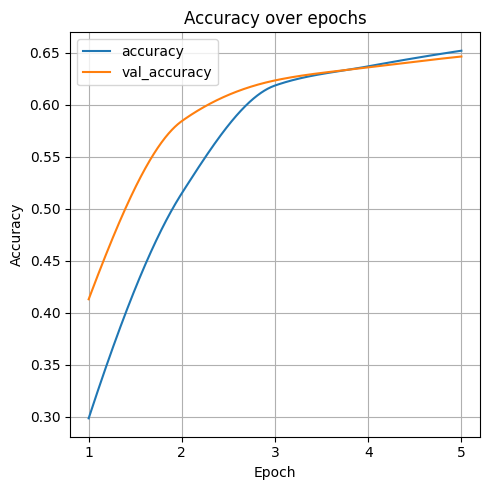

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Accuracy over epochs'}, xlabel='Epoch', ylabel='Accuracy'>)

In [5]:
history.plot("accuracy", with_val=True)

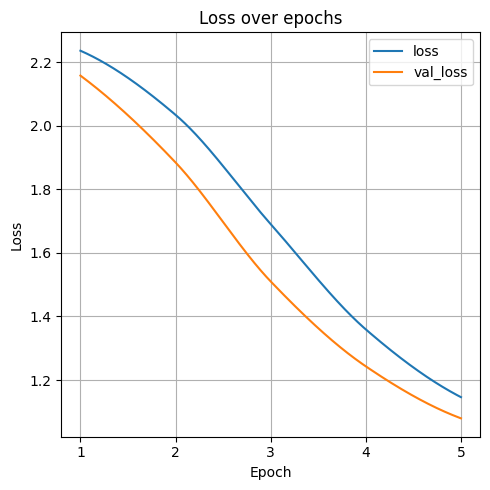

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': 'Loss over epochs'}, xlabel='Epoch', ylabel='Loss'>)

In [6]:
history.plot("loss", with_val=True)